<a href="https://colab.research.google.com/github/cycloneintensity/CrossKnotHacks-Cyclonet/blob/main/model_training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 for dataset access mail to verma.sshubam@gmail.com

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchsummary import summary
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
!unzip cyclone_ds.zip

Archive:  cyclone_ds.zip
   creating: CYCLONE_DATASET_INFRARED/
  inflating: CYCLONE_DATASET_INFRARED/63.jpg  
  inflating: CYCLONE_DATASET_INFRARED/77.jpg  
  inflating: CYCLONE_DATASET_INFRARED/85(2).jpg  
  inflating: CYCLONE_DATASET_INFRARED/62.jpg  
  inflating: CYCLONE_DATASET_INFRARED/74.jpg  
  inflating: CYCLONE_DATASET_INFRARED/60.jpg  
  inflating: CYCLONE_DATASET_INFRARED/48.jpg  
  inflating: CYCLONE_DATASET_INFRARED/64(2).jpg  
  inflating: CYCLONE_DATASET_INFRARED/42(3).jpg  
  inflating: CYCLONE_DATASET_INFRARED/61(1).jpg  
  inflating: CYCLONE_DATASET_INFRARED/57(1).jpg  
  inflating: CYCLONE_DATASET_INFRARED/40(2).jpg  
  inflating: CYCLONE_DATASET_INFRARED/49(1).jpg  
  inflating: CYCLONE_DATASET_INFRARED/34(1).jpg  
  inflating: CYCLONE_DATASET_INFRARED/45(1).jpg  
  inflating: CYCLONE_DATASET_INFRARED/49.jpg  
  inflating: CYCLONE_DATASET_INFRARED/61.jpg  
  inflating: CYCLONE_DATASET_INFRARED/75.jpg  
  inflating: CYCLONE_DATASET_INFRARED/74(2).jpg  
  inflating: 

In [ ]:
import pandas as pd
pd.read_csv('Untitled spreadsheet - Sheet1 (1).csv')

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [ ]:
TRAIN_DIR = '/content/CYCLONE_DATASET_INFRARED'
ROOT_DIR = '/content'

In [ ]:
def get_train_file_path(id):
    return f"{TRAIN_DIR}/{id}"     

In [ ]:
df = pd.read_csv(f"{ROOT_DIR}/Untitled spreadsheet - Sheet1 (1).csv")
df['file_path'] = df['img_name'].apply(get_train_file_path)

In [ ]:
df

,img_name,label,file_path
0,25.jpg,25,/content/CYCLONE_DATASET_INFRARED/25.jpg
1,27.jpg,27,/content/CYCLONE_DATASET_INFRARED/27.jpg
2,28.jpg,28,/content/CYCLONE_DATASET_INFRARED/28.jpg
3,30.jpg,30,/content/CYCLONE_DATASET_INFRARED/30.jpg
4,30(1).jpg,30,/content/CYCLONE_DATASET_INFRARED/30(1).jpg
...,...,...,...
131,112.jpg,112,/content/CYCLONE_DATASET_INFRARED/112.jpg
132,115.jpg,115,/content/CYCLONE_DATASET_INFRARED/115.jpg
133,118.jpg,118,/content/CYCLONE_DATASET_INFRARED/118.jpg
134,119.jpg,119,/content/CYCLONE_DATASET_INFRARED/119.jpg


In [ ]:
df = df.drop([df.index[32] , df.index[116], df.index[124]])

In [ ]:
df

,img_name,label,file_path
0,25.jpg,25,/content/CYCLONE_DATASET_INFRARED/25.jpg
1,27.jpg,27,/content/CYCLONE_DATASET_INFRARED/27.jpg
2,28.jpg,28,/content/CYCLONE_DATASET_INFRARED/28.jpg
3,30.jpg,30,/content/CYCLONE_DATASET_INFRARED/30.jpg
4,30(1).jpg,30,/content/CYCLONE_DATASET_INFRARED/30(1).jpg
...,...,...,...
131,112.jpg,112,/content/CYCLONE_DATASET_INFRARED/112.jpg
132,115.jpg,115,/content/CYCLONE_DATASET_INFRARED/115.jpg
133,118.jpg,118,/content/CYCLONE_DATASET_INFRARED/118.jpg
134,119.jpg,119,/content/CYCLONE_DATASET_INFRARED/119.jpg


In [ ]:
df.keys

<bound method NDFrame.keys of       img_name  label                                    file_path
0       25.jpg     25     /content/CYCLONE_DATASET_INFRARED/25.jpg
1       27.jpg     27     /content/CYCLONE_DATASET_INFRARED/27.jpg
2       28.jpg     28     /content/CYCLONE_DATASET_INFRARED/28.jpg
3       30.jpg     30     /content/CYCLONE_DATASET_INFRARED/30.jpg
4    30(1).jpg     30  /content/CYCLONE_DATASET_INFRARED/30(1).jpg
..         ...    ...                                          ...
131    112.jpg    112    /content/CYCLONE_DATASET_INFRARED/112.jpg
132    115.jpg    115    /content/CYCLONE_DATASET_INFRARED/115.jpg
133    118.jpg    118    /content/CYCLONE_DATASET_INFRARED/118.jpg
134    119.jpg    119    /content/CYCLONE_DATASET_INFRARED/119.jpg
135    128.jpg    128    /content/CYCLONE_DATASET_INFRARED/128.jpg

[133 rows x 3 columns]>

In [ ]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135],
           dtype='int64', length=133)

In [ ]:
class CycloneDataset(Dataset):
  def __init__(self, df, transforms=None):
    self.df = df
    self.file_names = df['file_path'].values
    self.labels = df['label'].values
    self.transforms = transforms
        
  def __len__(self):
    return len(self.df)

#transforms.compose reminder
 
  def __getitem__(self, index):
    img_path = self.file_names[index]
    img = cv2.imread(img_path)
    img = np.array(img)
    totensor = transforms.ToTensor()
    img = totensor(img)
    resize = transforms.Resize(size=(250, 250))
    img = resize(img)
    flip = transforms.RandomHorizontalFlip(p = 0.5)
    img = flip(img)
    label = self.labels[index]
        
    if self.transforms:
      img = self.transforms(image=img)["image"]
            
    return img, torch.tensor(label, dtype=torch.long).float()

In [ ]:
dataset = CycloneDataset(df)

In [ ]:
dataset

In [ ]:
dataset = CycloneDataset(df)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
data_loader

In [ ]:
import numpy as np

In [ ]:
# for view_img, view_label in data_loader:
#   print(view_img, view_label)

In [ ]:
dataset[131]

(tensor([[[0.0586, 0.0919, 0.0937,  ..., 0.3122, 0.3959, 0.6549],
          [0.0615, 0.0888, 0.0908,  ..., 0.3367, 0.4274, 0.6604],
          [0.0699, 0.0814, 0.0817,  ..., 0.3306, 0.4435, 0.6610],
          ...,
          [0.2446, 0.2799, 0.2681,  ..., 0.2422, 0.3200, 0.6517],
          [0.2574, 0.2914, 0.2837,  ..., 0.1351, 0.1860, 0.6763],
          [0.2032, 0.2301, 0.2356,  ..., 0.2539, 0.2850, 0.7164]],
 
         [[0.1048, 0.1336, 0.1325,  ..., 0.9440, 0.8998, 0.9758],
          [0.1021, 0.1269, 0.1247,  ..., 0.9553, 0.9186, 0.9782],
          [0.1091, 0.1183, 0.1137,  ..., 0.9339, 0.9187, 0.9776],
          ...,
          [0.6178, 0.6697, 0.6799,  ..., 0.5661, 0.6001, 0.8764],
          [0.6741, 0.7248, 0.7418,  ..., 0.3501, 0.3707, 0.8158],
          [0.6455, 0.6923, 0.7242,  ..., 0.4144, 0.4178, 0.8015]],
 
         [[0.5457, 0.5861, 0.5963,  ..., 0.9360, 0.8880, 0.9719],
          [0.5593, 0.5917, 0.6009,  ..., 0.9692, 0.9330, 0.9784],
          [0.5715, 0.5879, 0.5945,  ...,

INTENSITY: 40.0 KNOTS
SIZE: torch.Size([3, 250, 250])



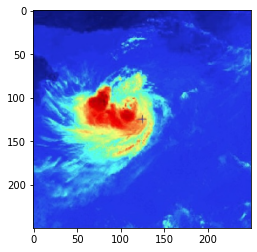

In [ ]:
#print a random image from the dataset
import random
i = random.randint(0, 132)
# x = dataset[i]["image"]
# y = dataset[i]["label"]
# size = dataset[i]["image"].shape
img, label = dataset[i]
size = img.shape
print(f"INTENSITY: {label} KNOTS")
print(f"SIZE: {size}\n")
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
for i in range(132):
  x, y = dataset[i]
  # x = dataset[i]["image"]
  print(x.shape)

torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([

In [ ]:
# RESIZE TO SAME
# DONE :D

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),
        nn.Linear(784, 1),
    )
  def forward(self, x):
    return self.model(x)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = Model().to(device)
summary(model, (3, 250, 250))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 250, 250]           7,168
       BatchNorm2d-2        [-1, 256, 250, 250]             512
              ReLU-3        [-1, 256, 250, 250]               0
            Conv2d-4        [-1, 256, 250, 250]         590,080
       BatchNorm2d-5        [-1, 256, 250, 250]             512
              ReLU-6        [-1, 256, 250, 250]               0
         MaxPool2d-7        [-1, 256, 125, 125]               0
            Conv2d-8        [-1, 128, 125, 125]         295,040
       BatchNorm2d-9        [-1, 128, 125, 125]             256
             ReLU-10        [-1, 128, 125, 125]               0
           Conv2d-11        [-1, 128, 125, 125]         147,584
      BatchNorm2d-12        [-1, 128, 125, 125]             256
             ReLU-13        [-1, 128, 125, 125]               0
        MaxPool2d-14          [-1, 128,

In [ ]:
loss_per_iteration = []
def train_batch(epochs, model, criterion, optimizer, train_loader):
  total = 0
  correct = 0 
  for i in range(epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      labels = torch.unsqueeze(labels, 1)
      loss = criterion(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss = train_loss + loss.item()

    print(f"Epoch: {i}/{epochs} Loss: {train_loss/len(train_loader):.5f} ")
    loss_per_iteration.append(train_loss/len(train_loader))

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Mar 15 09:41:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    34W / 250W |   7809MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model = Model().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.001)

train_batch(epochs=35,
            model=model,
            criterion=criterion,
            optimizer=optimizer,
            train_loader = data_loader)

Epoch: 0/40 Loss: 2411.31552 
Epoch: 1/40 Loss: 915.67965 
Epoch: 2/40 Loss: 497.40488 
Epoch: 3/40 Loss: 453.76269 
Epoch: 4/40 Loss: 452.09357 
Epoch: 5/40 Loss: 491.28315 
Epoch: 6/40 Loss: 403.75021 
Epoch: 7/40 Loss: 422.87397 
Epoch: 8/40 Loss: 406.61560 
Epoch: 9/40 Loss: 340.29401 
Epoch: 10/40 Loss: 399.35788 
Epoch: 11/40 Loss: 350.00114 
Epoch: 12/40 Loss: 324.78222 
Epoch: 13/40 Loss: 290.93693 
Epoch: 14/40 Loss: 317.79394 
Epoch: 15/40 Loss: 295.02648 
Epoch: 16/40 Loss: 288.30678 
Epoch: 17/40 Loss: 272.29258 
Epoch: 18/40 Loss: 255.22025 
Epoch: 19/40 Loss: 231.20786 
Epoch: 20/40 Loss: 233.57762 
Epoch: 21/40 Loss: 240.36691 
Epoch: 22/40 Loss: 225.28644 
Epoch: 23/40 Loss: 215.36949 
Epoch: 24/40 Loss: 202.09612 
Epoch: 25/40 Loss: 187.29650 
Epoch: 26/40 Loss: 188.39581 
Epoch: 27/40 Loss: 156.10751 
Epoch: 28/40 Loss: 142.67887 
Epoch: 29/40 Loss: 164.61677 
Epoch: 30/40 Loss: 169.65871 
Epoch: 31/40 Loss: 175.85457 
Epoch: 32/40 Loss: 125.78276 
Epoch: 33/40 Loss: 

In [ ]:
model.eval()

In [ ]:
img = cv2.imread('/content/94.jpg')
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(248, 248))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
model(img)

In [ ]:
#96-112knots

In [ ]:
img = cv2.imread('/content/43(2).jpg')
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(248, 248))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
model(img)

tensor([[56.1818]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
from pip._internal.utils.misc import get_installed_distributions
import sys
#import numpy as np # imported to test whether numpy shows up, which it does!

def get_imported_packages():
    p = get_installed_distributions()
    p = {package.key:package.version for package in p}

    imported_modules = set(sys.modules.keys())
    
    imported_modules.remove('pip')

    modules = [(m, p[m]) for m in imported_modules if p.get(m, False)]

    return modules


def generate_requirements(filepath:str, modules):
    with open(filepath, 'w') as f:
        for module, version in modules:
            f.write(f"{module}=={version}")


generate_requirements('requirements.txt', get_imported_packages())

In [ ]:
saved_path = './saved_modelcyclonr'
torch.save(model.state_dict(), saved_path)

In [ ]:
# torch.save(model.state_dict,'cyclonemodel2.h5')

In [ ]:
# torch.save(model.state_dict,'cyclonemodel2.pth')

In [ ]:
model= Model()
model.load_state_dict(torch.load('/content/saved_modelcyclone', map_location=torch.device('cpu')))
model.eval()

Model(
  (model): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [ ]:
path = '/content/30.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
# img = img.to(device)
model(img)

tensor([[41.0617]], grad_fn=<AddmmBackward0>)

In [ ]:
path = '/content/94.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
# img = img.to(device)
model(img)

tensor([[81.0453]], grad_fn=<AddmmBackward0>)

In [ ]:
from google.colab import files
files.download('saved_modelcyclone')